In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge#for using linear regrassion
from sklearn.metrics import confusion_matrix , accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("data 1.csv")

In [18]:
#now testing with train test spilit method

#ml me agar X,y hai to us ka matlab hai matix agar x,y hai to us ka matlab ahi vector
from sklearn.model_selection import train_test_split

X = data[["Open","High","vol","Low"]]#independent
y = data[["Close"]]#dependent

#______________cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03)#(X label data, y label data , % of testing data ,)
#agar hame train ke liya % me data dena hai to train_size ka use kerange


In [19]:
#ridge and lasso regresion training and fitting
model = LinearRegression()
model.fit(X_train,y_train)
model_score = model.score(X_test,y_test)
pre = model.predict(X_test)

model_lasso = Lasso(alpha = 5005)#by default alpha is 1 so ihave put alpha = 5005 as it give best result in it
model_lasso.fit(X_train,y_train)
model_lasso_pre = model_lasso.predict(X_test)
model_lasso_score = model_lasso.score(X_test, y_test)

model_ridge = Ridge(alpha = 400000)#by default alpha is 1 so ihave put alpha = 400000 as it give best result in it
model_ridge.fit(X_train,y_train)
model_ridge_pre = model_ridge.predict(X_test)
model_ridge_score = model_ridge.score(X_test, y_test)

In [20]:
#    now cheking with poly nomiyal linera regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

 
poly_reg = PolynomialFeatures(degree=1)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lr = LinearRegression() 
lr.fit(X_train_poly, y_train) 
lr.score(X_test_poly, y_test,)
prepl = lr.predict(X_test_poly)
print(prepl-y_test)

          Close
186  -28.347514
141 -129.264307
204  -14.707088
174  -22.599839
29    -6.488901
128  -81.913230
83    33.039803


In [21]:
#rms jada error = under fit   0 error = over fit

mselr = mean_squared_error(y_test,pre)
rmslr = np.sqrt(mselr)

msels = mean_squared_error(y_test,model_lasso_pre)
rmsls = np.sqrt(msels)

mserg = mean_squared_error(y_test,model_ridge_pre)
rmsrg = np.sqrt(mserg)

msepr = mean_squared_error(y_test, pre)
rmsepr = np.sqrt(msepr)


#print(f"mse\nmselr={mselr}  msels={msels}   mserg={mserg}\n  msepr={msepr}")
print(f"rmse\nrmslr={rmslr}  rmsls={rmsls}   rmsrg={rmsrg}  rmsepr={rmsepr}")
print("\n\n")
print("scores are:-alpha=my \n",model_lasso_score,"===Lasso\n",model_ridge_score,"===ridge\n",model_score,"==Lr\n")
print("this are the max result we can made with this module")

rmse
rmslr=61.04261451596994  rmsls=104.44006823154348   rmsrg=77.71361280485776  rmsepr=61.04261451596994



scores are:-alpha=my 
 0.9817350947941152 ===Lasso
 0.9898870624060475 ===ridge
 0.9937605058474334 ==Lr

this are the max result we can made with this module


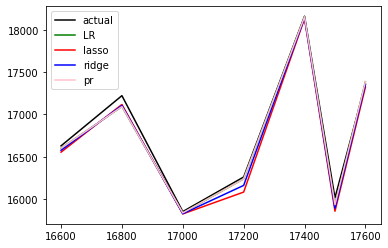

In [22]:
plt.plot([16600,16800,17000,17200,17400,17500,17600],y_test,label = "actual",color = "k")
plt.plot([16600,16800,17000,17200,17400,17500,17600],pre,color = "g",label = "LR")
plt.plot([16600,16800,17000,17200,17400,17500,17600],model_lasso_pre,label = "lasso",color = "r")
plt.plot([16600,16800,17000,17200,17400,17500,17600],model_ridge_pre,color = "b",label = "ridge")
plt.plot([16600,16800,17000,17200,17400,17500,17600],prepl,color = "pink",label = "pr")
plt.legend()

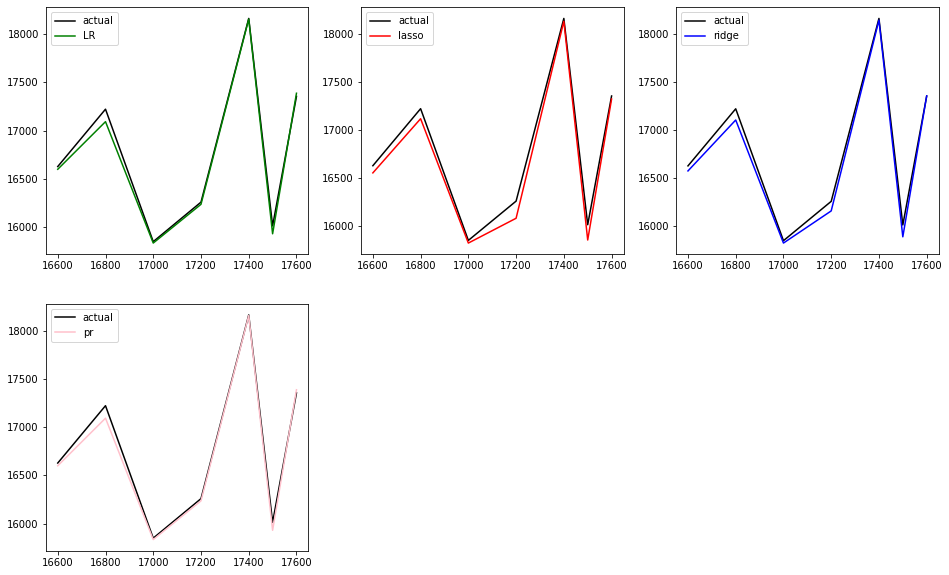

In [27]:
plt.figure(figsize = (16,10))
plt.subplot(2,3,1)
plt.plot([16600,16800,17000,17200,17400,17500,17600],y_test,label = "actual",color = "k")
plt.plot([16600,16800,17000,17200,17400,17500,17600],pre,color = "g",label = "LR")
plt.legend()

plt.subplot(2,3,2)
plt.plot([16600,16800,17000,17200,17400,17500,17600],y_test,label = "actual",color = "k")
plt.plot([16600,16800,17000,17200,17400,17500,17600],model_lasso_pre,label = "lasso",color = "r")
plt.legend()

plt.subplot(2,3,3)
plt.plot([16600,16800,17000,17200,17400,17500,17600],y_test,label = "actual",color = "k")
plt.plot([16600,16800,17000,17200,17400,17500,17600],model_ridge_pre,color = "b",label = "ridge")
plt.legend()

plt.subplot(2,3,4)
plt.plot([16600,16800,17000,17200,17400,17500,17600],y_test,label = "actual",color = "k")
plt.plot([16600,16800,17000,17200,17400,17500,17600],prepl,color = "pink",label = "pr")

plt.legend()

In [ ]:
#          NOT SO GOOD